# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.025692e+01     6.952330e+00
 * time: 0.004528999328613281
     1     2.892160e+01     5.823264e+00
 * time: 0.02099299430847168
     2     2.040923e+01     5.311815e+00
 * time: 0.04067492485046387
     3     1.438914e+01     3.399261e+00
 * time: 0.06012701988220215
     4     1.142713e+01     1.549009e+00
 * time: 0.0801088809967041
     5     1.048428e+01     1.852927e+00
 * time: 0.0961599349975586
     6     9.971141e+00     1.118336e+00
 * time: 0.11224794387817383
     7     9.517424e+00     1.325017e+00
 * time: 0.12817597389221191
     8     9.001181e+00     1.197584e+00
 * time: 0.143996000289917
     9     8.735216e+00     9.145069e-01
 * time: 0.1595909595489502
    10     8.543527e+00     6.897187e-01
 * time: 0.17546582221984863
    11     8.382691e+00     5.980990e-01
 * time: 0.19137883186340332
    12     8.242786e+00     6.713029e-01
 * time: 0.20328092575073242
    13     8.197288e+00     6.008833e-01
 * time: 0.2

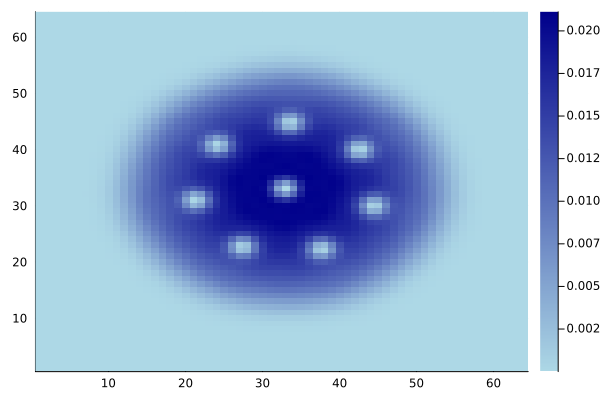

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)